In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
from plotly.offline import iplot
!pip install joypy
import joypy

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

data = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

Cancer occurs when changes called mutations take place in genes that regulate cell growth. The mutations let the cells divide and multiply in an uncontrolled way.

Breast cancer is cancer that develops in breast cells. Typically, the cancer forms in either the lobules or the ducts of the breast. Lobules are the glands that produce milk, and ducts are the pathways that bring the milk from the glands to the nipple. Cancer can also occur in the fatty tissue or the fibrous connective tissue within your breast.

The uncontrolled cancer cells often invade other healthy breast tissue and can travel to the lymph nodes under the arms. The lymph nodes are a primary pathway that help the cancer cells move to other parts of the body. [Source](https://www.healthline.com/health/breast-cancer).

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTv4VRY344bf6NKTdhY1DU-eBaWS-WQt7mmIQ&usqp=CAU" height="300px" width="500px">

<h1>Types of Breast Cancer</h1>

There are several types of breast cancer, and they are broken into two main categories: “invasive” and “noninvasive,” or in situ. While invasive cancer has spread from the breast ducts or glands to other parts of the breast, noninvasive cancer has not spread from the original tissue.

These two categories are used to describe the most common types of breast cancer, which include:

1. Ductal carcinoma in situ. Ductal carcinoma in situ (DCIS) is a noninvasive condition. With DCIS, the cancer cells are confined to the ducts in your breast and haven’t invaded the surrounding breast tissue.
2. Lobular carcinoma in situ. Lobular carcinoma in situ (LCIS) is cancer that grows in the milk-producing glands of your breast. Like DCIS, the cancer cells haven’t invaded the surrounding tissue.
3. Invasive ductal carcinoma. Invasive ductal carcinoma (IDC) is the most common type of breast cancer. This type of breast cancer begins in your breast’s milk ducts and then invades nearby tissue in the breast. Once the breast cancer has spread to the tissue outside your milk ducts, it can begin to spread to other nearby organs and tissue.
4. Invasive lobular carcinoma. Invasive lobular carcinoma (ILC) first develops in your breast’s lobules and has invaded nearby tissue.

# Description of Data

In [2]:
#describing data

data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [3]:
#covariance in data

data.cov()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.563015e+16,3.287883e+07,5.364807e+07,2.222490e+08,4.262946e+09,-22802.053383,631.883924,499127.721282,214217.739286,-75792.615857,...,4.973106e+07,3.360214e+08,7.629681e+09,29510.163781,-58383.413342,605181.617857,289052.809853,-342061.639212,-67437.508622,NaN
radius_mean,3.287883e+07,1.241892e+01,4.907582e+00,8.544714e+01,1.224483e+03,0.008454,0.094197,0.190128,0.112475,0.014273,...,6.433100e+00,1.142886e+02,1.888227e+03,0.009625,0.229249,0.387386,0.172393,0.035746,0.000450,NaN
texture_mean,5.364807e+07,4.907582e+00,1.849891e+01,3.443976e+01,4.859938e+02,-0.001415,0.053767,0.103692,0.048977,0.008419,...,2.411015e+01,5.174593e+01,8.412838e+02,0.007611,0.188010,0.270110,0.083491,0.027942,0.009260,NaN
perimeter_mean,2.222490e+08,8.544714e+01,3.443976e+01,5.904405e+02,8.435772e+03,0.070836,0.714714,1.387234,0.802360,0.121922,...,4.525811e+01,7.923282e+02,1.302615e+04,0.083526,1.742478,2.858506,1.231848,0.284300,0.022391,NaN
area_mean,4.262946e+09,1.224483e+03,4.859938e+02,8.435772e+03,1.238436e+05,0.876178,9.264931,19.244924,11.241958,1.459596,...,6.218249e+02,1.134179e+04,1.921926e+05,0.992514,21.616602,37.634415,16.701789,3.125809,0.023756,NaN
smoothness_mean,-2.280205e+04,8.454460e-03,-1.414779e-03,7.083607e-02,8.761781e-01,0.000198,0.000490,0.000585,0.000302,0.000215,...,3.118110e-03,1.128795e-01,1.655299e+00,0.000259,0.001045,0.001276,0.000465,0.000343,0.000127,NaN
compactness_mean,6.318839e+02,9.419706e-02,5.376681e-02,7.147141e-01,9.264931e+00,0.000490,0.002789,0.003718,0.001703,0.000873,...,8.054412e-02,1.047413e+00,1.532344e+01,0.000682,0.007194,0.008994,0.002831,0.001667,0.000656,NaN
concavity_mean,4.991277e+05,1.901276e-01,1.036923e-01,1.387234e+00,1.924492e+01,0.000585,0.003718,0.006355,0.002850,0.001094,...,1.469342e-01,1.954350e+00,3.068241e+01,0.000817,0.009469,0.014704,0.004513,0.002020,0.000741,NaN
concave points_mean,2.142177e+05,1.124751e-01,4.897693e-02,8.023604e-01,1.124196e+01,0.000302,0.001703,0.002850,0.001506,0.000492,...,6.981902e-02,1.116016e+00,1.788688e+01,0.000401,0.004075,0.006091,0.002321,0.000902,0.000258,NaN
symmetry_mean,-7.579262e+04,1.427317e-02,8.418876e-03,1.219216e-01,1.459596e+00,0.000215,0.000873,0.001094,0.000492,0.000752,...,1.527421e-02,2.018958e-01,2.765725e+00,0.000267,0.002041,0.002481,0.000775,0.001187,0.000217,NaN


In [4]:
#correlation in data

data.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


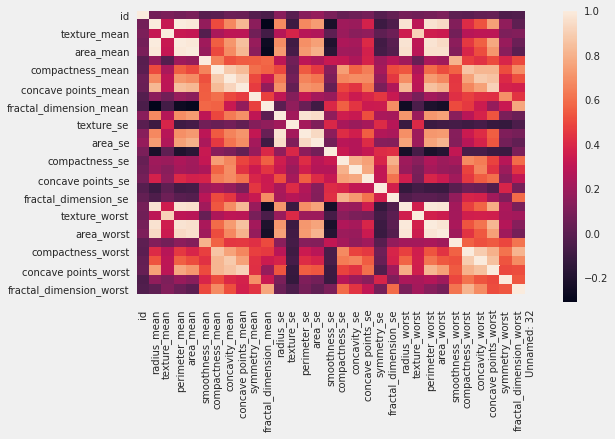

In [5]:
sns.heatmap(data.corr())
plt.show()

# Checking for missing and duplicate values

Missing Values Plot


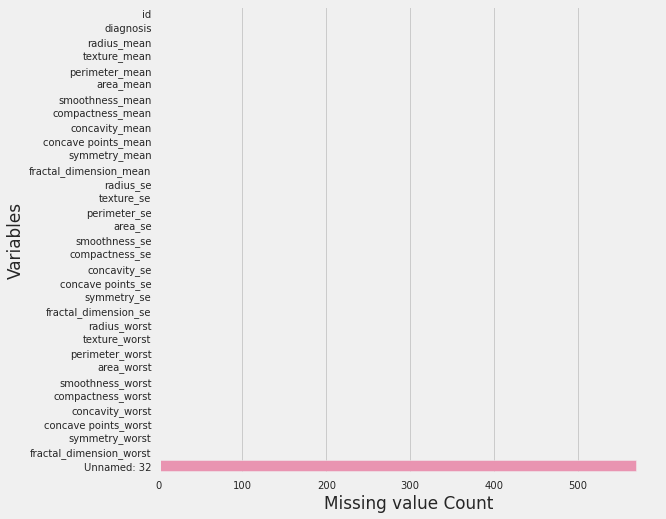

In [6]:
print('Missing Values Plot')
plt.figure(figsize=(8,8))
sns.barplot(data=data.isnull().sum().reset_index(), y='index', x=0)
plt.ylabel('Variables')
plt.xlabel('Missing value Count')
plt.show()